<a href="https://www.kaggle.com/code/ranjeetshrivastav/playground-catberry?scriptVersionId=129121649" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'/kaggle/input/playground-series-s3e14/train.csv')
train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [3]:
test = pd.read_csv(r'/kaggle/input/playground-series-s3e14/test.csv')
test.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [4]:
sub = pd.read_csv(r'/kaggle/input/playground-series-s3e14/sample_submission.csv')
sub.head()

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194


In [5]:
print(f'train set have {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'test set have {test.shape[0]} rows and {test.shape[1]} columns.') 
print(f'sample_submission set have {sub.shape[0]} rows and {sub.shape[1]} columns.') 

train set have 15289 rows and 18 columns.
test set have 10194 rows and 17 columns.
sample_submission set have 10194 rows and 2 columns.


In [6]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000
MinOfLowerTRange,15289.0,28.660553,3.195367,24.300000,27.000000,30.000000,30.000000,33.000000


In [9]:
train.nunique()

clonesize                  6
honeybee                   7
bumbles                   11
andrena                   16
osmia                     14
MaxOfUpperTRange           6
MinOfUpperTRange           5
AverageOfUpperTRange       5
MaxOfLowerTRange           6
MinOfLowerTRange           7
AverageOfLowerTRange       5
RainingDays                6
AverageRainingDays         8
fruitset                1526
fruitmass               1515
seeds                   2066
yield                    776
dtype: int64

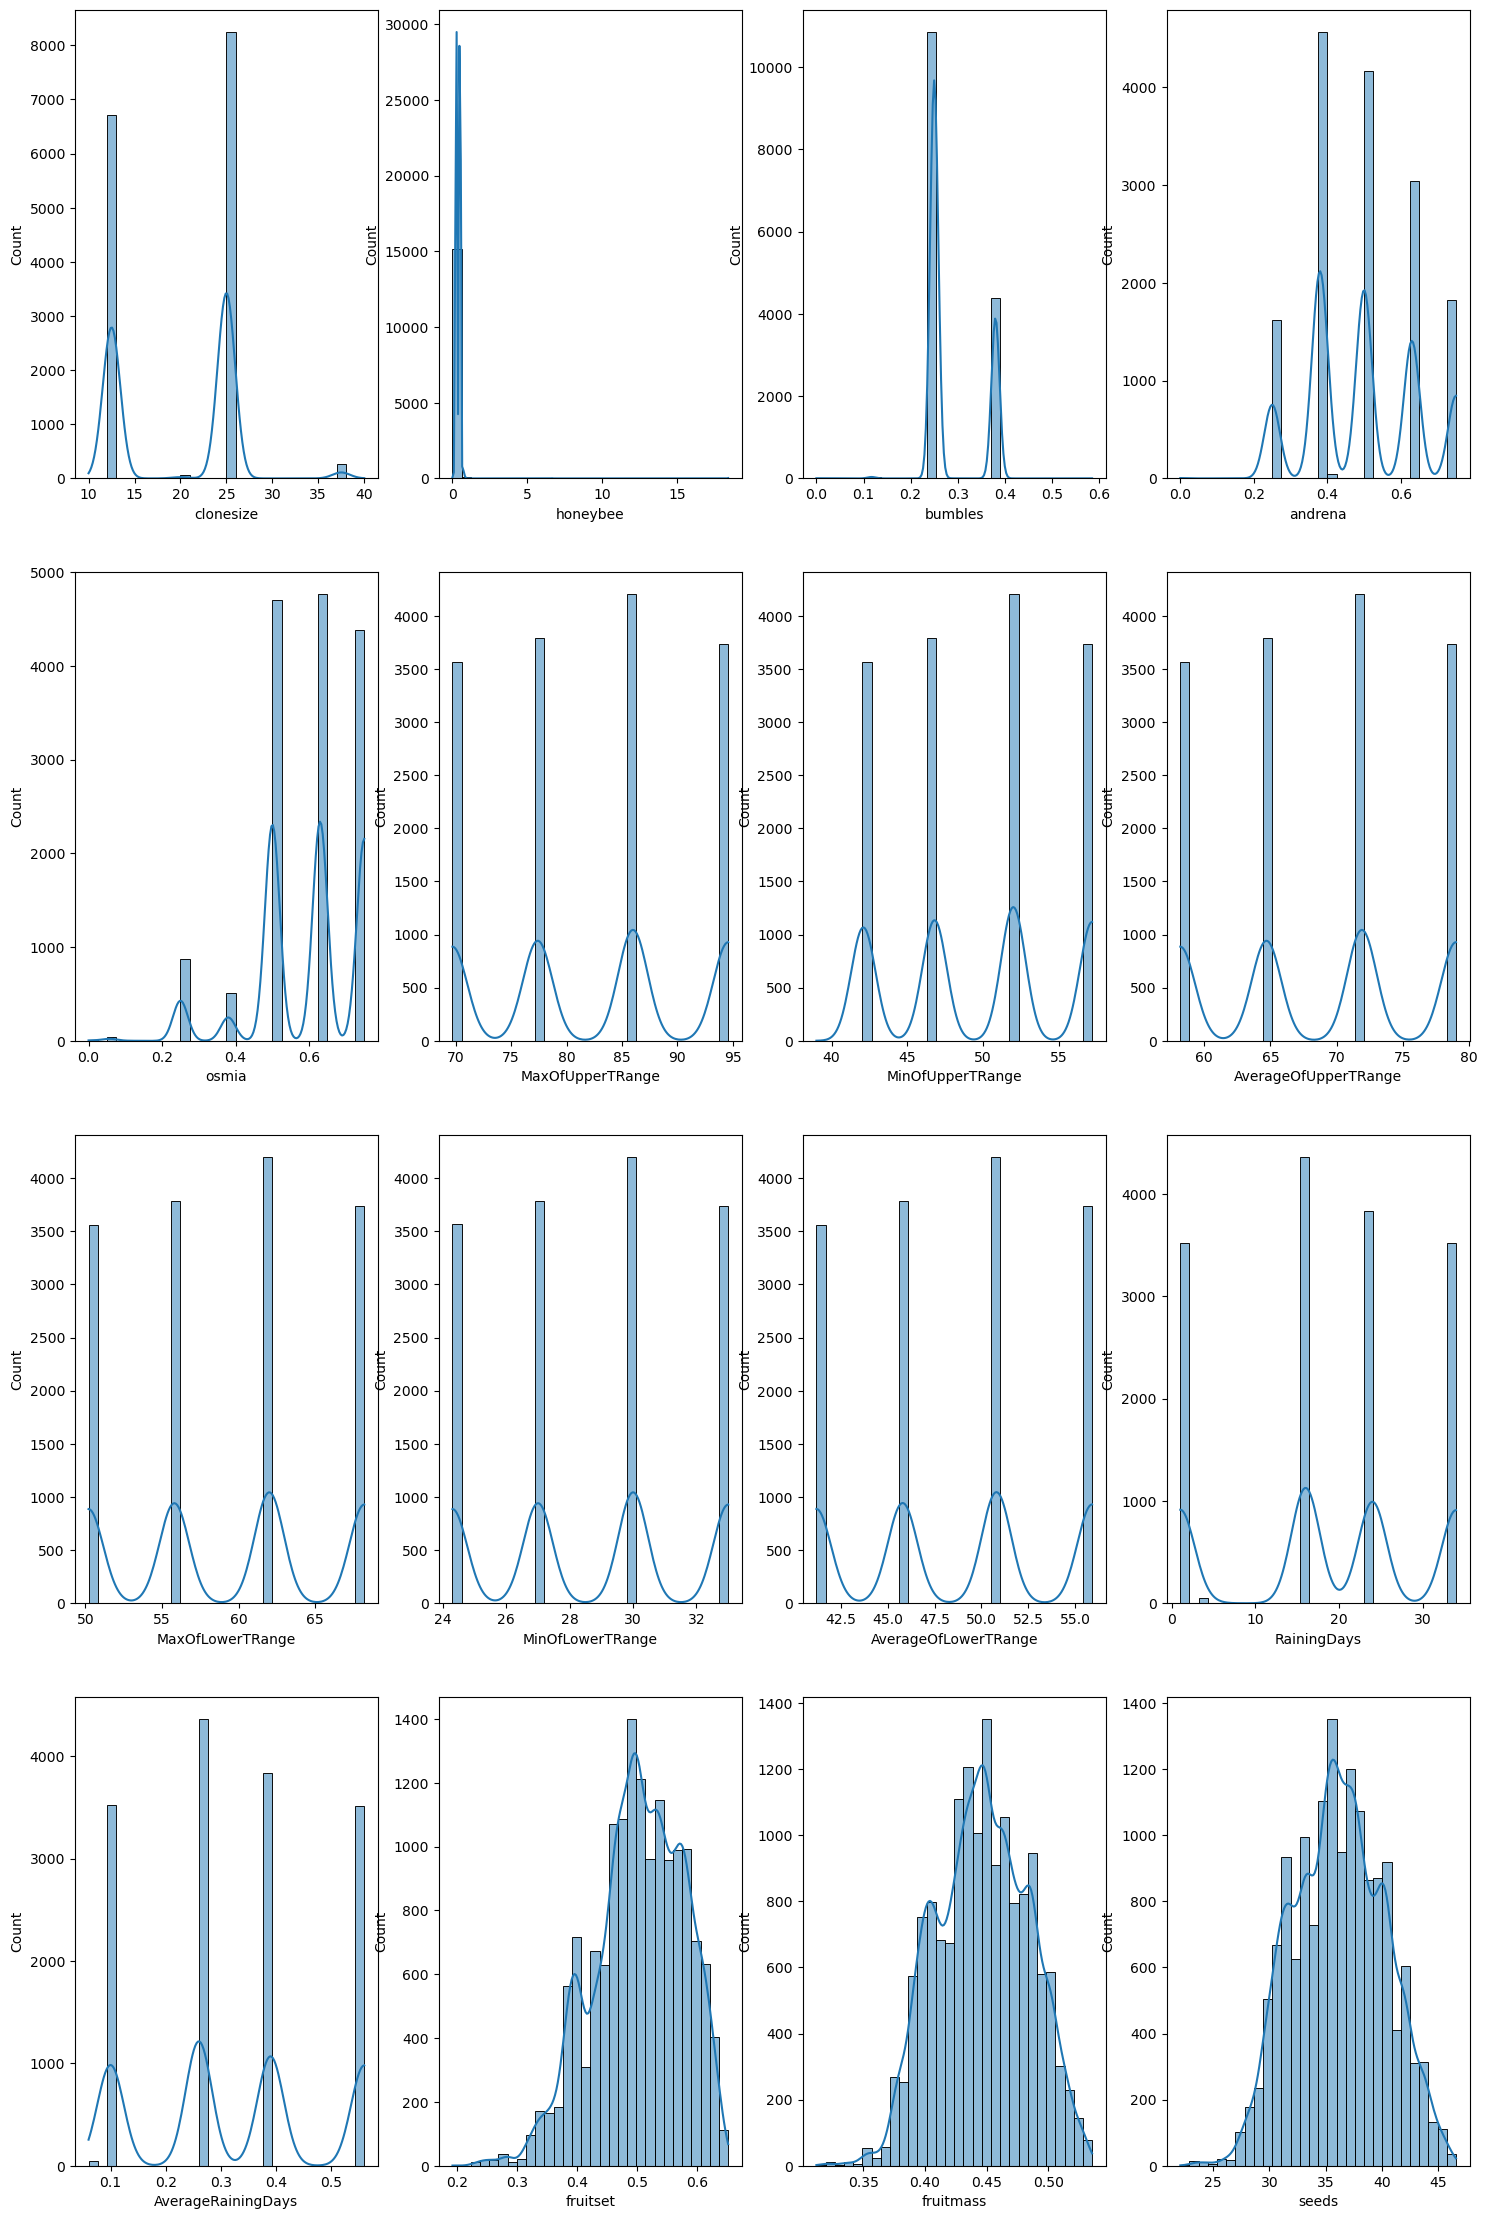

In [10]:
def plot(data):
    fig, axes = plt.subplots(4, 4, figsize=(18, 28))
    for i, ax in zip(train.columns,axes.flatten()):
        sns.histplot(data=train, x=i, kde=True, bins=30, ax=ax)
        fig.show()
        
plot(train)

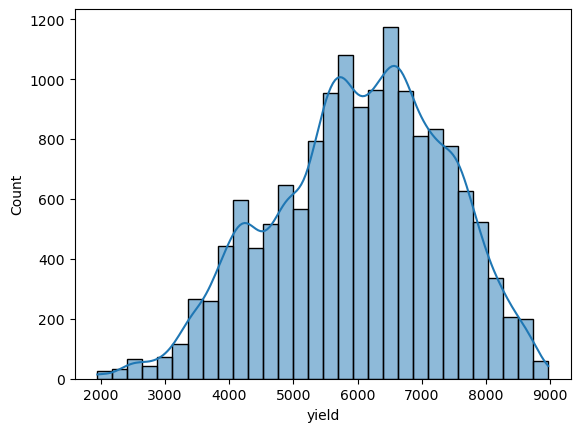

In [11]:
# Target feature
sns.histplot(data = train, x = 'yield', kde = True, bins=30)
plt.show()

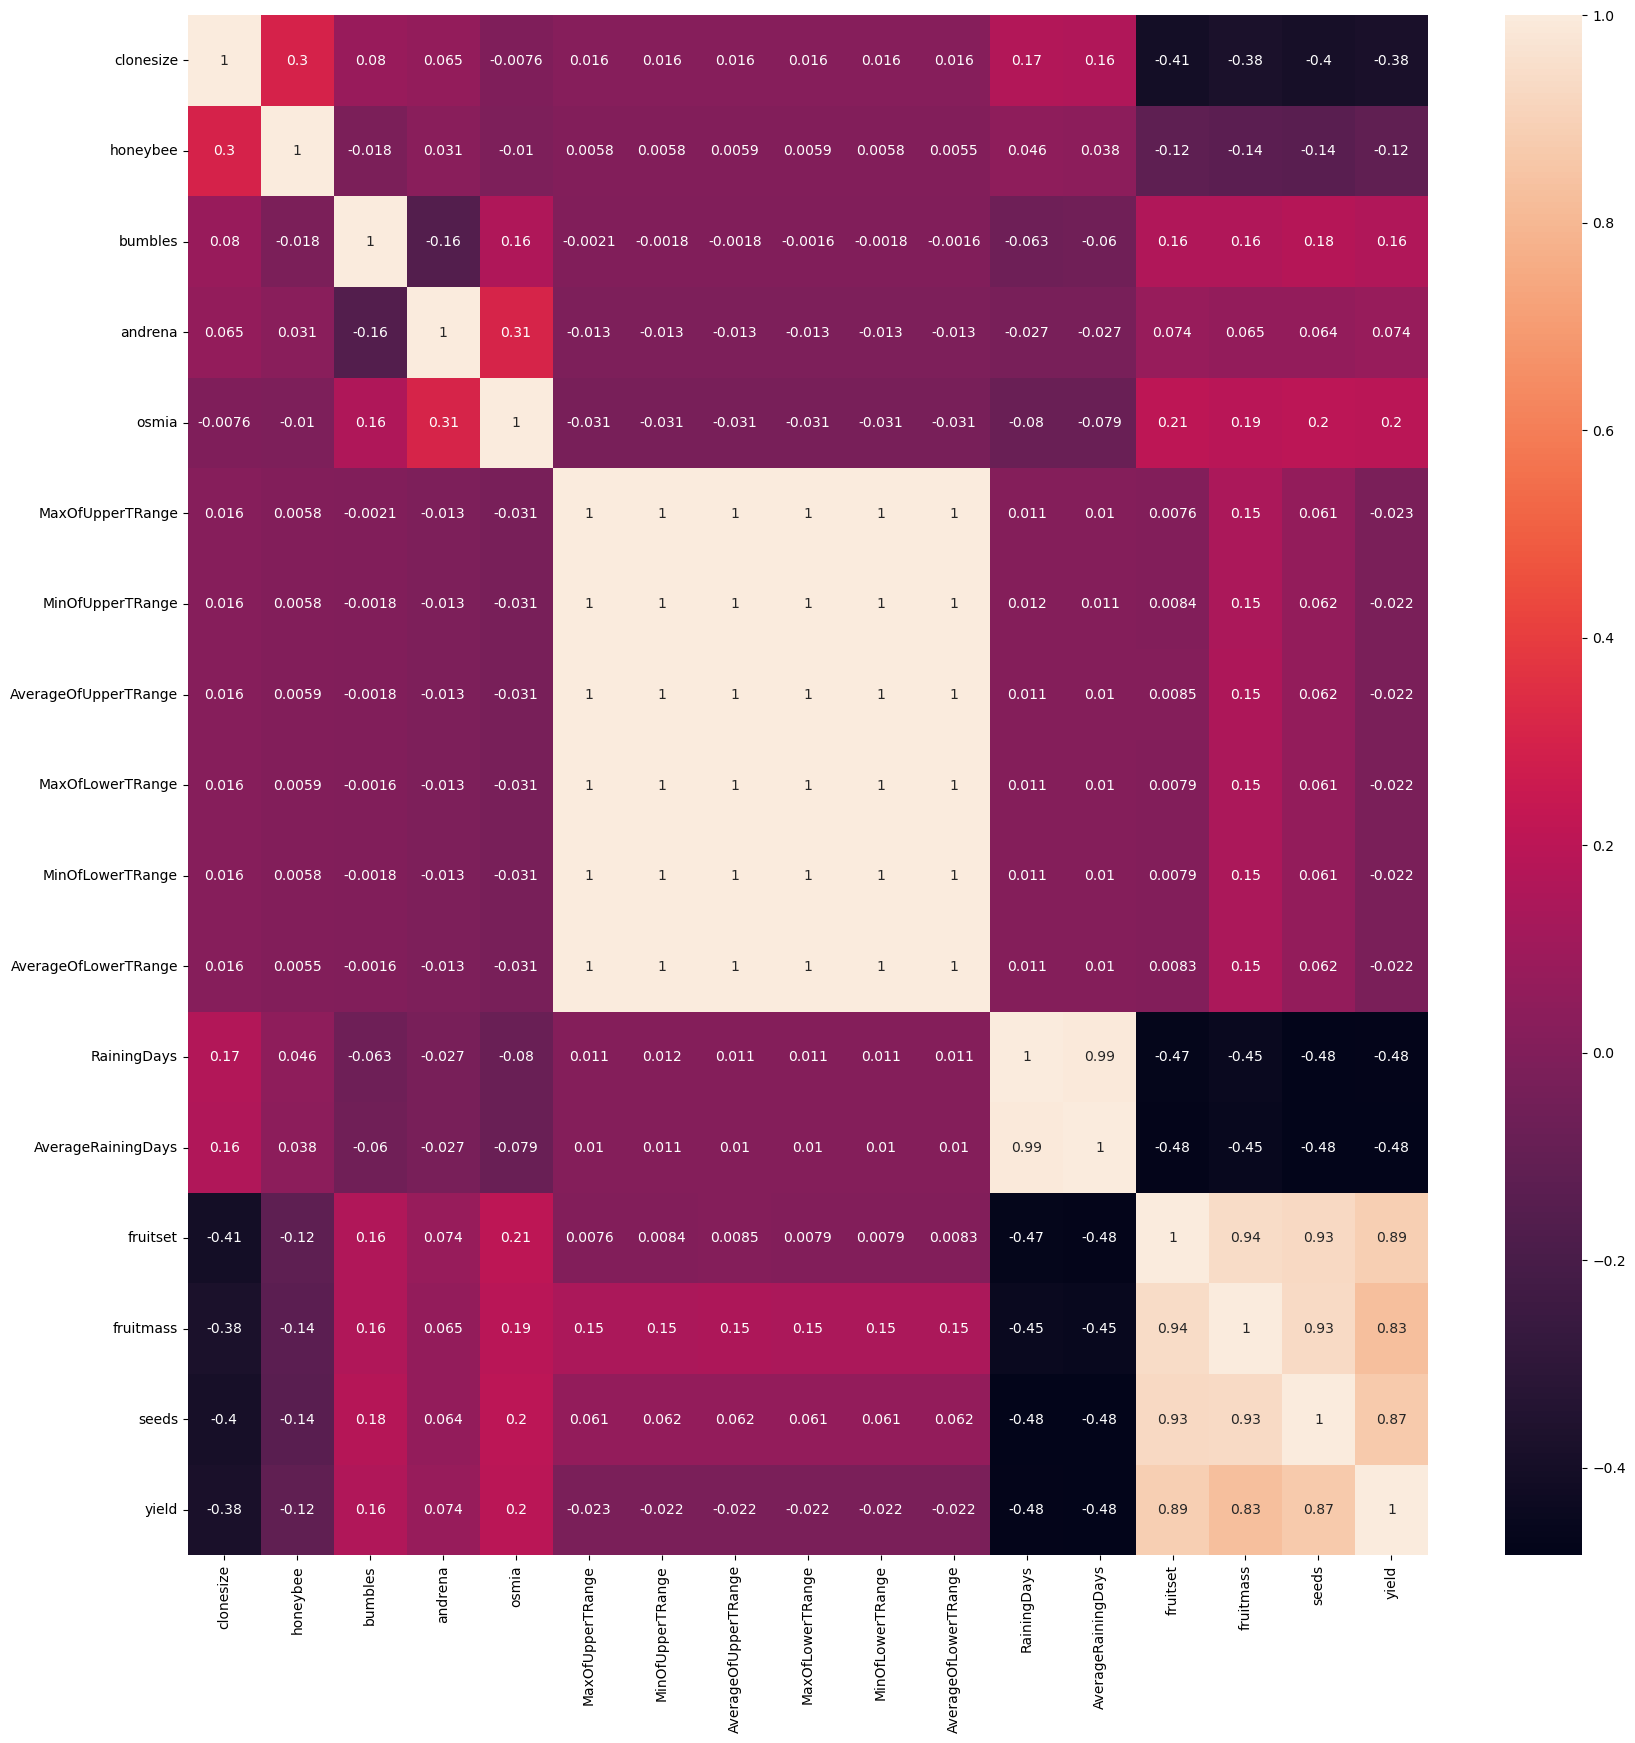

In [12]:
# fetaure correlation
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)
plt.show()

- Removing columns which are highly correlated to each other.(<0.70)

In [13]:
train.drop(['AverageRainingDays','MaxOfUpperTRange','MinOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange'],axis = 1, inplace = True)
test.drop(['AverageRainingDays','MaxOfUpperTRange','MinOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange'],axis = 1, inplace = True)

In [14]:
X = train.drop('yield',axis=1)
y = train['yield']

In [15]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

folds = KFold(n_splits=5, shuffle=True, random_state = 42)

for fold, (trn_idx, val_idx) in enumerate(folds.split(X)):
    print(f"Fold: {fold}")
    X_train, X_test = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[trn_idx], y.iloc[val_idx]

    model = CatBoostRegressor()
   
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
                early_stopping_rounds=100,
                verbose=200)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f" MAE: {mae}")
    print("-"*50)

Fold: 0
Learning rate set to 0.075444
0:	learn: 1266.5653410	test: 1254.1615637	best: 1254.1615637 (0)	total: 61.8ms	remaining: 1m 1s
200:	learn: 534.8250735	test: 554.3279597	best: 554.0307794 (158)	total: 644ms	remaining: 2.56s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 553.1877981
bestIteration = 277

Shrink model to first 278 iterations.
 MAE: 349.6820651371762
--------------------------------------------------
Fold: 1
Learning rate set to 0.075444
0:	learn: 1260.1457648	test: 1282.0514538	best: 1282.0514538 (0)	total: 3.07ms	remaining: 3.07s
200:	learn: 525.8100133	test: 588.4571271	best: 588.4570399 (199)	total: 567ms	remaining: 2.25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 588.2193906
bestIteration = 252

Shrink model to first 253 iterations.
 MAE: 367.89317298115935
--------------------------------------------------
Fold: 2
Learning rate set to 0.075444
0:	learn: 1259.6471100	test: 1267.6213163	best: 1267.6213163 (0)	total: 3.4

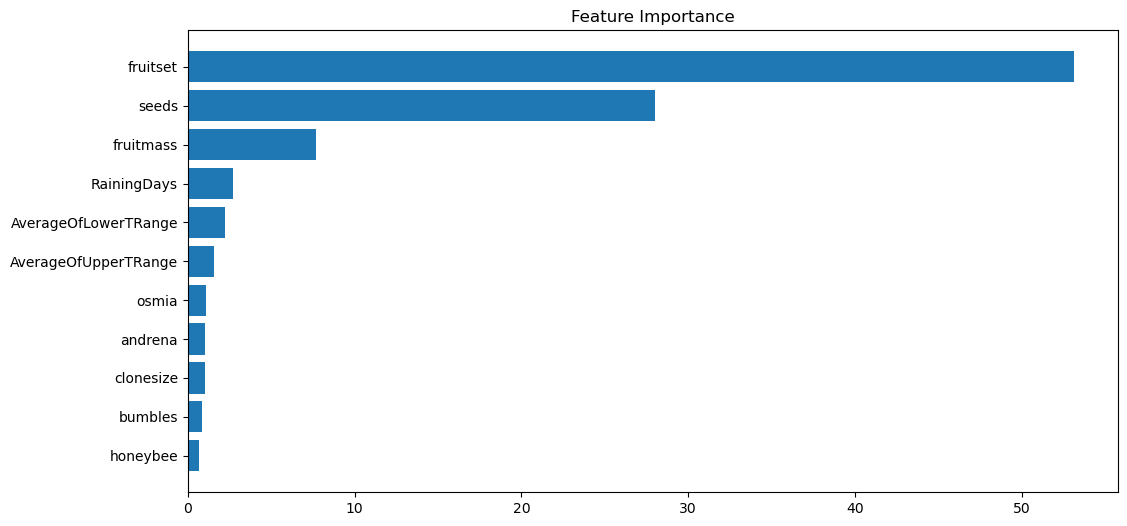

In [16]:
# Feature Importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [17]:
sub['yield'] = model.predict(test)
sub.to_csv('submission',index=False)
sub.head()

,id,yield
0,15289,4281.202433
1,15290,6372.449107
2,15291,7181.052594
3,15292,4738.195136
4,15293,3952.416271
